## PHYS 2820 - Fall 2016
# Final Exam

Date: *December 7*

### Name: Solutions
### Student ID:

### Instructions
1. The exam is for 180 minutes starting at 9:00am.
2. Your completed Jupyter notebook (.ipynb file) should be submitted via D2L dropbox. 
3. The exam is open book and you may use lecture notes, the labs, your assignments, assigned readings, and Internet access is permitted.
4. Electronic communication with another student or any other person is not allowed during the test.
5. Scrap paper is available upon request.
6. **Read carefully and answer the questions exactly as asked**

In [38]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import sympy as sp
sp.init_printing()
from IPython.display import display

## Question 1:

Download the file called final_vcar.dat from D2L (it should already available on the lab computers). It contains two columns of data: time (s) in the first, speed (m/s) in the second. The data represent the slowing down of a racecar after it deploys a braking parachute.


### 1a) [3 pts]
Import and plot the data.

Text(0,0.5,'speed (m/s)')

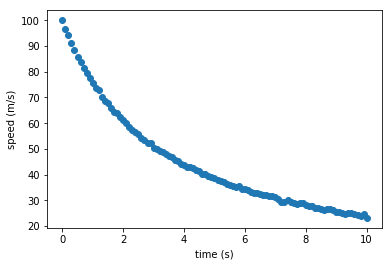

In [39]:
data_t, data_v = np.loadtxt("data/final_vcar.dat", unpack = True)

plt.plot(data_t, data_v, 'o')
plt.xlabel('time (s)')
plt.ylabel('speed (m/s)')

### 1b) [4 pts]
Determine the acceleration of the car as a function of time using the (discrete form of) the *centred difference* approximation for the first derivative of a function. Plot the acceleration as a function of time.

Text(0,0.5,'acceleration (m/s$^2$)')

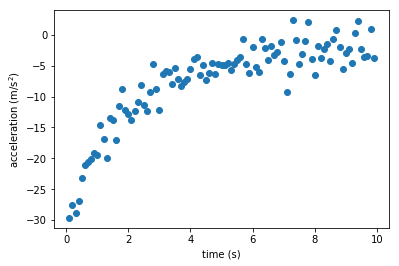

In [40]:
def cd(t, v, i):
    return (v[i + 1] - v[i - 1]) / (t[i + 1] - t[i - 1])

accel = np.zeros(len(data_t) - 2)
for i in range(1, len(data_t) - 1):
    accel[i - 1] = cd(data_t, data_v, i)

plt.plot(data_t[1:-1], accel, 'o')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s$^2$)')

### 1c) [4 pts]
Determine the displacement of the car as a function of time using the *trapezoid rule* to approximate the integral of a function. Plot the displacement as a function of time.

Text(0,0.5,'displacement (m)')

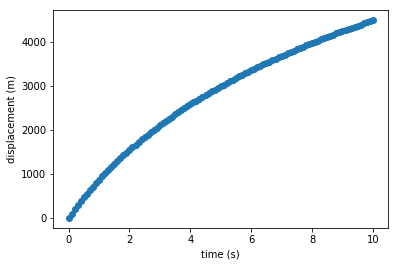

In [41]:
displ = np.zeros(len(data_t))

for i in range(1, len(data_t)):
    displ[i] = displ[i-1] + 0.5*(data_v[i]+data_v[i-1])
    

plt.plot(data_t, displ, 'o')
plt.xlabel('time (s)')
plt.ylabel('displacement (m)')

### 1d) [4 pts]

The parachute provides a drag force of magnitude $b v^2$, where $v$ is the speed of the car.

Determine the drag coefficient $b$ to 3 significant figures by appropriately plotting the data and determining the slope through a linear least-squares fit.  The mass of the car 1420 kg.

The drag coefficient is b=4.557


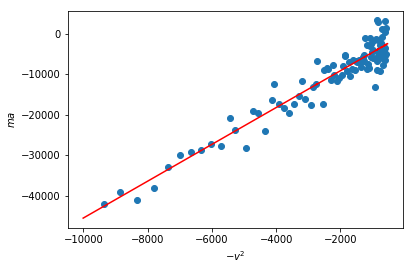

In [42]:
m = 1420
plt.plot(-data_v[1:-1]**2, m*accel, 'o')
p = np.polyfit(-data_v[1:-1]**2, m*accel, 1)
plt.plot(-data_v**2, np.polyval(p, -data_v**2), 'r-')
plt.xlabel('$-v^2$')
plt.ylabel('$m a$')

print('The drag coefficient is b={:.3f}'.format(p[0]))

## Question 2: [15 pts]

The speed of a rocket in outer space as a function of time v(t) is governed by the following expression


Eq. 1 $\qquad \qquad m \frac{dv}{dt} = -u \frac{dm}{dt}$

where u=500 m/s is the speed of the exhaust relative to the rocket, m(t) is the mass of the rocket and $\frac{dm}{dt}$ is the rate at which the rocket's mass is changing (from the burning of fuel; $\frac{dm}{dt}$ is negative ). 

Here, $\frac{dm}{dt}$ is related to the speed of the rocket, with the rocket burning fuel more quickly the faster the rocket travels and is governed by

Eq. 2 $\qquad \qquad \frac{dm}{dt} = R - \frac{v}{100},$

where $R = -10$ kg/s (a constant). So Eq. 1 becomes

Eq. 1 $\qquad \qquad m\frac{dv}{dt} = -u\left(R - \frac{v}{100}\right)$

Assume that the initial speed of the rocket is zero and its mass is 1000 kg initially.

### 2a) [6 pts] 
Write your own Midpoint scheme (second order Runge Kutta) to solve Eq.1 and Eq.2 simultaneously in order to find and plot m(t) and v(t) up to t=70 s.  Use a timestep of 0.1 s

In [96]:
# set parameters
u = 450
R = -11
    
def solve(dt = 0.1):
    tmax = 70
    N = round(tmax/dt)

    # allocate space for solution
    v = np.zeros(N)
    m = np.zeros(N)
    t = np.zeros(N)

    # initial conditions
    t[0] = 0
    v[0] = 0
    m[0] = 1030

    # derivatives
    def fv(v, m):
        return -u * (R - v/100)/m

    def fm(v, m):
        return R - v/100

    for i in range(N-1):
        t[i+1] = t[i] + dt

        sv1 = fv(v[i], m[i])
        sm1 = fm(v[i], m[i])

        v1 = v[i] + sv1*dt/2
        m1 = m[i] + sm1*dt/2

        sv2 = fv(v1, m1)
        sm2 = fm(v1, m1)

        v2 = v[i] + sv2*dt
        m2 = m[i] + sm2*dt

        v[i+1] = v2
        m[i+1] = m2
        
    return v, m, t

v, m, t = solve() 

Text(0,0.5,'mass (kg)')

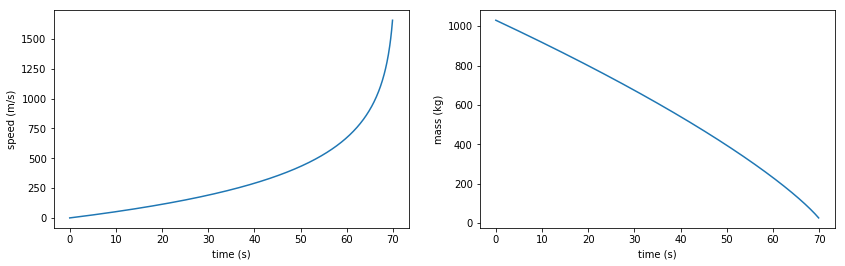

In [97]:
fig, axes = plt.subplots(1, 2, figsize=(14,4))

plt.sca(axes[0])
plt.plot(t, v)
plt.xlabel('time (s)')
plt.ylabel('speed (m/s)')

plt.sca(axes[1])
plt.plot(t, m)
plt.xlabel('time (s)')
plt.ylabel('mass (kg)')


### 2b) [4 pts]
Solve  Eq.1 and Eq.2 again using `odeint` from scipy.integrate. Also plot the absolute difference of the solutions between your RK2 solver and `odeint`. 

In [92]:
def RHS(q, t):
    v, m = q
    dvdt = -u * (R - v/100)/m
    dmdt = R - v/100
      
    return [dvdt, dmdt]

q0 = (0, 1030) # v=0, m=1000
sol = odeint(RHS, q0, t)
ode_v, ode_m = sol.T

Text(0,0.5,'difference in mass (kg)')

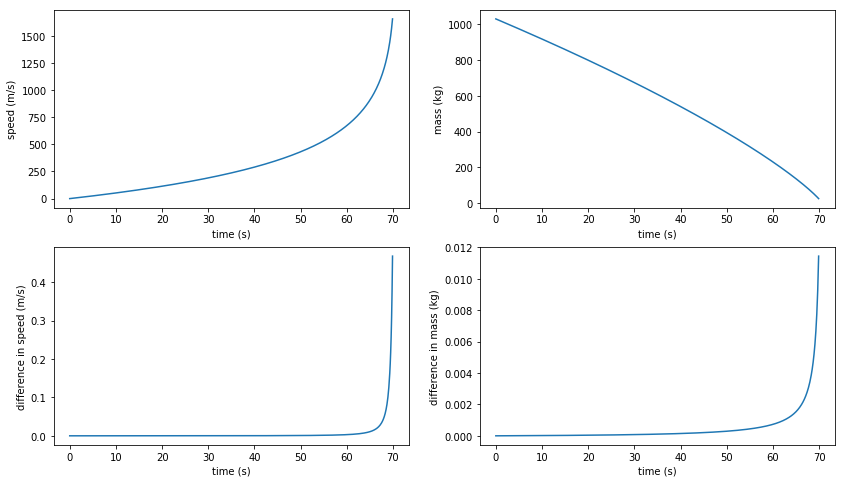

In [93]:
fig, axes = plt.subplots(2, 2, figsize=(14,8))

plt.sca(axes[0, 0])
plt.plot(t, ode_v)
plt.xlabel('time (s)')
plt.ylabel('speed (m/s)')

plt.sca(axes[0, 1])
plt.plot(t, ode_m)
plt.xlabel('time (s)')
plt.ylabel('mass (kg)')

plt.sca(axes[1, 0])
plt.plot(t, abs(ode_v - v))
plt.xlabel('time (s)')
plt.ylabel('difference in speed (m/s)')

plt.sca(axes[1,1])
plt.plot(t, abs(ode_m - m))
plt.xlabel('time (s)')
plt.ylabel('difference in mass (kg)')

### 2c) [2 pts]
How would you expect the plot of the difference between your solution and `odeint`'s to change if $\Delta$t were decreased by a factor of 10?  Why?  (You can also simply illustrate what happens and provide a rationale for the behaviour.) 

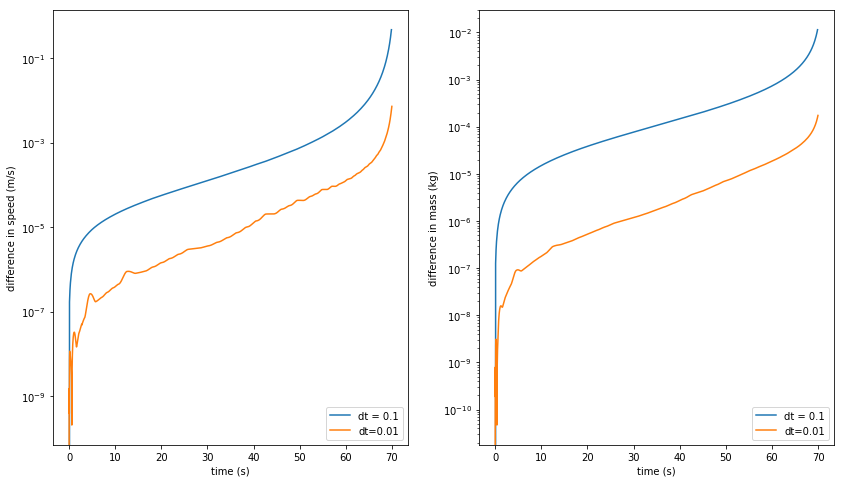

In [94]:
v10, m10, t10 = solve(dt=0.01)

sol10 = odeint(RHS, q0, t10)
ode_v10, ode_m10 = sol10.T

fig, axes = plt.subplots(1, 2, figsize=(14,8))

plt.sca(axes[0])
plt.semilogy(t, abs(ode_v - v), label='dt = 0.1')
plt.semilogy(t10, abs(ode_v10 - v10), label='dt=0.01')
plt.xlabel('time (s)')
plt.ylabel('difference in speed (m/s)')
plt.legend(loc='lower right')

plt.sca(axes[1])
plt.semilogy(t, abs(ode_m - m), label='dt = 0.1')
plt.semilogy(t10, abs(ode_m10 - m10), label='dt=0.01')
plt.xlabel('time (s)')
plt.ylabel('difference in mass (kg)')
plt.legend(loc='lower right')

**Answer:** Since the midpoint scheme is second order, decreasing the time step by a factor of 10 reduces the error on the order of 100 as shown by the above semilog plots.

### 2d) [3 pts] 
Find the **time** at which the mass reaches 150 kg, i.e. when all the fuel has been burned up, and determine the **speed** of the rocket at that instant.

For full marks, you will need to *interpolate* the numerical solution to at least five significant figures.  For partial marks, you may estimate these values from the plots.

vfinal = 64.345 m/s and tfinal = 867.015 s


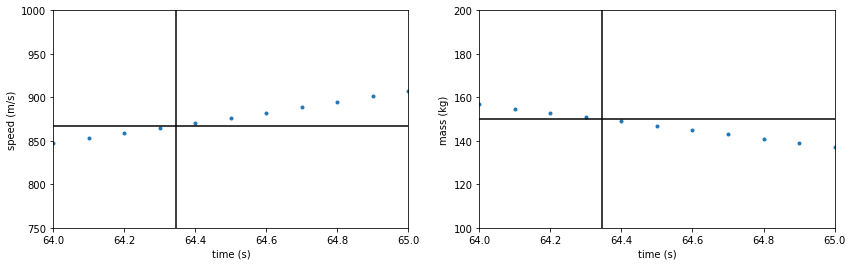

In [100]:
from scipy.interpolate import interp1d
tfinal = interp1d(ode_m, t)(150)
vfinal = interp1d(t, ode_v)(tfinal)

print('vfinal = {:.3f} m/s and tfinal = {:.3f} s'.format(float(tfinal), float(vfinal)))

fig, axes = plt.subplots(1, 2, figsize=(14,4))

plt.sca(axes[0])
plt.plot(t, ode_v, '.')
plt.xlabel('time (s)')
plt.ylabel('speed (m/s)')
plt.ylim(750, 1000)
plt.xlim(64,65)
plt.axhline(vfinal, color='k')
plt.axvline(tfinal, color='k')

plt.sca(axes[1])
plt.plot(t, ode_m, '.')
plt.xlabel('time (s)')
plt.ylabel('mass (kg)')
plt.axhline(150, color='k')
plt.axvline(tfinal, color='k')
plt.ylim(100, 200)
plt.xlim(64,65)


## Question 3: [15 pts]

A particle of unit mass initially at the $(x, y) = (0, 0.1)$ and with velocity of 0.6 m/s in the $x$-direction feels a force governed by a potential energy given by

$$U(x,y) = \sin(3x)\cos(2y)$$

### 3a) [4 pts]

Using SymPy, symbolically determine the components of the force ($f_x$ and $f_y$) due to the potential $U(x,y)$.

In [49]:
x, y = sp.symbols('x, y')

U = sp.sin(3*x)*sp.cos(2*y)

fx = -sp.diff(U, x)
fy = -sp.diff(U, y)

display(fx)
display(fy)

Fx = sp.lambdify([x, y], fx)
Fy = sp.lambdify([x, y], fy)
U = sp.lambdify([x, y], U, 'numpy')

### 3b) [5 pts]
There is an additional drag force of $-0.1 v$, where $v$ is the velocity of the particle.  Use `odeint` to solve for the x and y coordinates of the particle as functions of time from $t$=0 to $t$=10 s. 

In [50]:

def RHS(q, t):
    x, vx, y, vy = q
    
    dxdt = vx
    dvxdt = Fx(x, y) - 0.1*vx
    dydt = vy
    dvydt = Fy(x, y) - 0.1*vy
    
    dqdt = [dxdt, dvxdt, dydt, dvydt]
    return dqdt
    
t = np.arange(0, 10, 0.01)
q0 = (0, 0.6, 0.1, 0)
sol = odeint(RHS, q0, t)
x, vx, y, vy = sol.T

### 3c) [2 pts]
Plot the trajectory of the particle in the $xy$ plane.

Text(0,0.5,'y (m)')

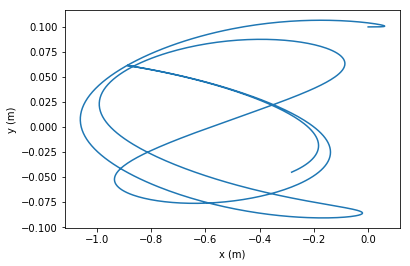

In [51]:
plt.plot(x, y)
plt.xlabel('x (m)')
plt.ylabel('y (m)')


### 3d) [2 pts]

Plot the kinetic energy, potential energy and total (mechanical) energy of the particle for the first 10 s.  Include a legend.

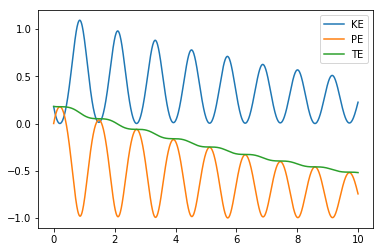

In [52]:
kinetic = 0.5 * 1 * (vx**2 + vy**2) 
potential = U(x, y)
total = kinetic + potential

plt.plot(t, kinetic, label='KE')
plt.plot(t, potential, label='PE')
plt.plot(t, total, label='TE')

plt.legend()

### 3e) [2 pts]

Is this system chaotic?  Explain.

**Answer:** No.  A small change in the initial conditions leads to a very similar solution.

## Question 4: [15 pts]

<img src="block-m1-F2011.png" width="500">

A 2.7 kg block is pushed up an inclined plane set at an angle of $\theta = 34^{\circ}$ up from the horizontal.  In addition to gravity, there is a time-varying horizontally applied force (pushing the block into and up the plane) with magnitude given by $$F(t)= 8 \mathrm{exp}(-t/3)\; \mathrm{N}.$$  The coefficient of friction depends slightly on the speed of the block and is given by $$0.2+0.1s,$$ where $s$ is the speed of the block relative to the surface of the plane in m/s.  At $t$=0, the block is sliding up the plane with speed 2 m/s.  The coordinate system to be used in this question is shown in the diagram.

**Note:** *This question is set up to use SymPy expression and variables. However, if SymPy is giving you a great deal of trouble, you may also complete this entire question for full marks without using SymPy at all.  If you do choose to not use SymPy, please define an equivalent Python function instead of an expression in each of the following question parts. * 

In [53]:
# declare some SymPy variables that may be used
x, v, t, s, θ, m, g = sp.symbols('x, v, t, s, θ, m, g')

# physical parameters for the question
params = { θ : np.deg2rad(34), 
           g : 9.8,
           m : 2.7,
           s : abs(v),
         }

### 4a) [1 pt]

Define an expression for the magnitude of the applied force as a function of time.

In [54]:
Fa = 8*sp.exp(-t/3)

display(Fa)

### 4b) [2 pt]
What are the x and y components of the applied force at t=4.1 s?


In [55]:
Fa_x = Fa*sp.cos(θ)

display( Fa_x.subs(params).subs(t, 4.1) )

In [56]:
Fa_y = -Fa*sp.sin(θ)

display( Fa_y.subs(params).subs(t, 4.1) )

### 4c) [2 pt]

What is the y component of the gravitational force on the block? 

What is the magnitude of the normal force at t=4.1 s? 

In [57]:
Fg = -m * g

Fg_y = Fg * sp.cos(θ)
Fg_x = Fg * sp.sin(θ)

display(Fg_y)

In [58]:
Fn = -Fa_y - Fg_y

display( Fn.subs(params).subs(t, 4.1) )

### 4d) [2 pts]

Define an expression for the magnitude of the friction force that depends on both time and speed of the block. 

What is the magnitude of the friction force at t=0? 

In [59]:
μ = 0.2 + 0.1*s
Ffric = μ * Fn

display( Ffric.subs(params).subs(t, 0).subs(v, 2) )

### 4e) [2 pts]

Define an expression for the total net force acting in the x-direction.  Be very mindful of the direction of the frictional force (it depends on the velocity in that it always acts against the motion of the block).  Recall that speed is just the magnitude of the velocity (absolute value in this case).

In [60]:
Fnet = Fa_x + Fg_x + -v/abs(v)*Ffric

display(Fnet)

### 4f) [2 pts]
Use `odeint` to find the position of the block on the inclined plane for the first 100 s (assuming $x$=0 at $t$=0). 

In [61]:
dvdt = sp.lambdify([v, t], (Fnet/m).subs(params), 'numpy')

def RHS(q, t):
    x, v = q
    return [ v, dvdt(v, t)]

t_sol = np.arange(0, 100, 0.01)
q0 = [0, 2.2]
sol = odeint(RHS, q0, t_sol)
x_sol, v_sol = sol.T

### f) [1 pts]
Plot your solution for up to $t$ = 1 s.

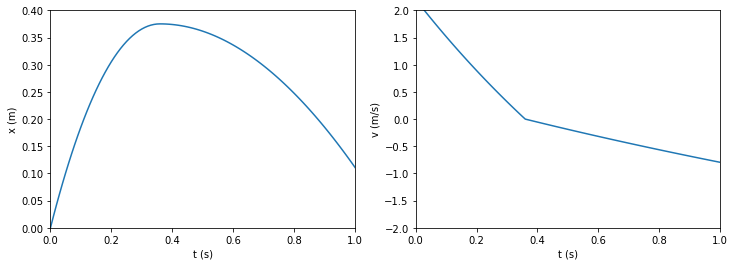

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

plt.sca(axes[0])
plt.plot(t_sol, x_sol)
plt.xlabel('t (s)')
plt.ylabel('x (m)')
plt.xlim(0, 1)
plt.ylim(0, 0.4)

plt.sca(axes[1])
plt.plot(t_sol, v_sol)
plt.xlabel('t (s)')
plt.ylabel('v (m/s)')
plt.xlim(0, 1)
plt.ylim(-2, 2)

### f) [1 pt]

How high up the plane does the block travel, and when does it reach that maximum?
*Use may use either interpolation or your plots from 4e)*

In [63]:
xmax = max(x_sol)

tmax = float(interp1d(x_sol, t_sol)(xmax))

print ('Maximum height occurs at tmax = {:.3f} s and xmax = {:.3f} m'.format(tmax, xmax))

Maximum height occurs at tmax = 0.360 s and xmax = 0.375 m


### g) [1 pt]

What is the magnitude of the friction force at 1 s? 

In [64]:
v1 = float(interp1d(t_sol, v_sol)(1))
Ffric1 = Ffric.subs(params).subs( {t:1, v:v1}).evalf()

print (' At t = 1 s, friction force = {:.3f} N'.format(Ffric1))

 At t = 1 s, friction force = 7.027 N


### h) [1pt]
Estimate the terminal speed of the block. 

The terminal velocity is -4.745 m/s


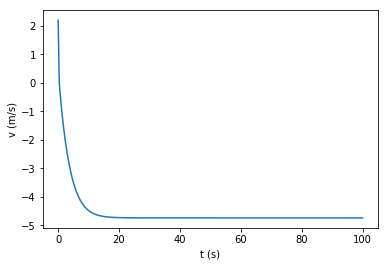

In [65]:
plt.plot(t_sol, v_sol)
plt.xlabel('t (s)')
plt.ylabel('v (m/s)')

vterminal = v_sol[-1]

print('The terminal velocity is {:.3f} m/s'.format(vterminal))